## Compute the elastic impedance and the normalized elastic impedance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import impedance as ip
%matplotlib inline

### Elastic properties for AVO classes
The cell below defines the elastic properties for AVO classes compiled by [Alessandro del Monte](http://nbviewer.ipython.org/github/aadm/geophysical_notes/blob/master/avo_explorer_v2_mono.ipynb). Originally, Class IV is from Castagna & Swan (1997) "Principles of AVO crossplotting" (1997) and the others from Hilterman (2001) "Seismic Amplitude Interpretation".

In [2]:
shale = np.array([[3094,1515,2.40], [2643,1167,2.29], [2192,818,2.16], [3240,1620,2.34]])
sandgas = np.array([[4050,2526,2.21], [2781,1665,2.08], [1542,901,1.88], [1650,1090,2.07]])
sandbrine = np.array([[4115,2453,2.32], [3048,1595,2.23], [2134,860,2.11], [2590,1060,2.21]])
avocl=['Class I','Class II','Class III','Class IV']

angle = 30

#### The properties will generate the logs

In [3]:
faceis_vet = np.zeros(5)
vp=np.zeros(5) + shale[0,0]
vs = np.zeros(5) + shale[0,1]
rho = np.zeros(5) + shale[0,2]
for i in range (len(avocl)):
    vp1 = np.zeros(100) + shale[i,0] #m/s
    vs1 = np.zeros(100) + shale[i,1]
    rho1 = np.zeros(100) + shale[i,2] #g/cc
    faceis_vet1 = np.zeros(100)
    
    vp2 = np.zeros(100) + sandgas[i,0]
    vs2 = np.zeros(100) + sandgas[i,1] #m/s
    rho2 = np.zeros(100) + sandgas[i,2] #g/cc
    faceis_vet2 = np.zeros(100) + 1
    
    vp3 = np.zeros(100) + sandbrine[i,0]
    vs3 = np.zeros(100) + sandbrine[i,1] #m/s
    rho3 = np.zeros(100) + sandbrine[i,2] #g/cc
    faceis_vet3 = np.zeros(100) + 2

    vp=np.concatenate((vp,vp1,vp2,vp1,vp3))
    vs=np.concatenate((vs,vs1,vs2,vs1,vs3))
    rho=np.concatenate((rho,rho1,rho2,rho1,rho3))
    faceis_vet=np.concatenate((faceis_vet,faceis_vet1,faceis_vet2,faceis_vet1,faceis_vet3))

vp += np.random.normal(0, np.max(np.abs(vp))*0.005, len(vp))
vs += np.random.normal(0, np.max(np.abs(vs))*0.005, len(vs))
rho += np.random.normal(0, np.max(np.abs(rho))*0.1, len(rho.shape))

vpvs=vp/vs
#poisson ratio
pr=0.5*((vpvs**2-2)/(vpvs**2-1))

ai=ip.ai(vp,rho) # acoustic impedance
ei=ip.ei(vp,vs,rho,angle) # elastic impedance
nei=ip.nei(vp,vs,rho,shale[2,0],shale[2,1],shale[2,2],angle) # normalized elastic impedance
lambda_rho,mu_rho=ip.lrm(vp,vs,rho) # lambda rho and mu rho

### Plot the logs - the tops of the gas sands are in red

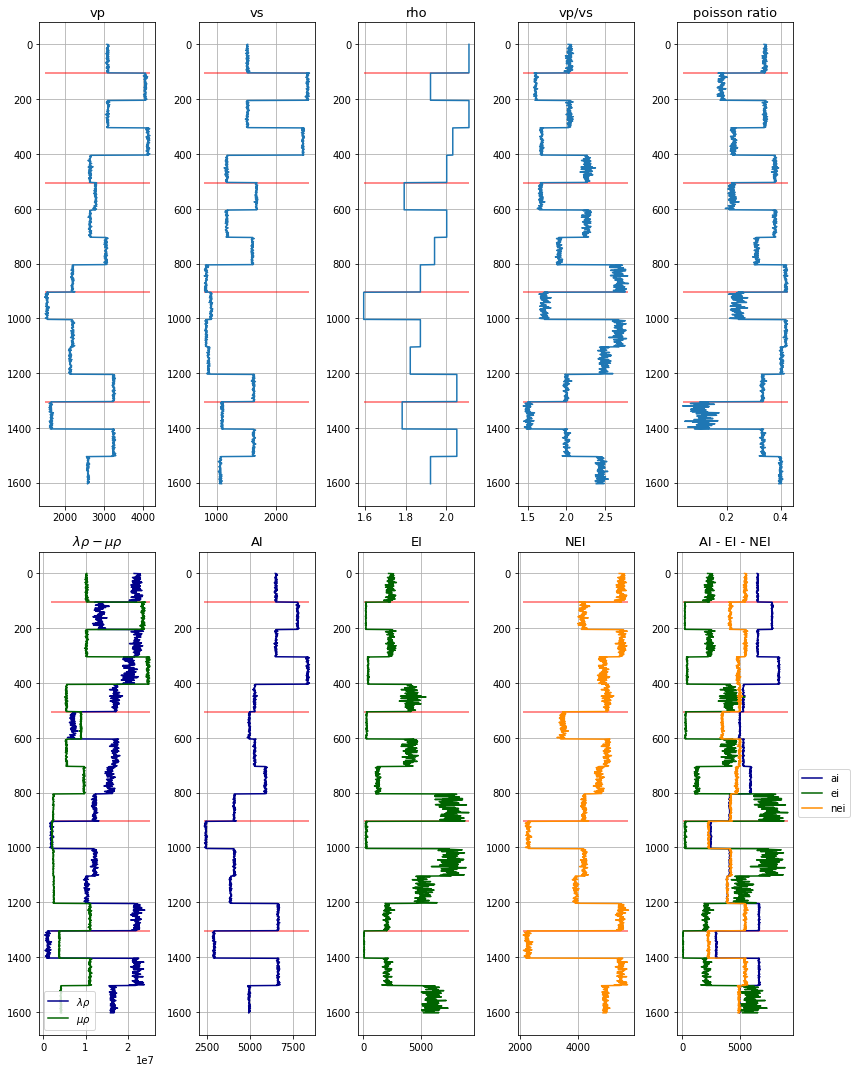

In [28]:
fig=plt.figure(figsize=(12,15))

ax=plt.subplot(2,5,1)
plt.title('vp',fontsize=13)
plt.plot(vp,np.arange(vp.shape[0]))
ax.invert_yaxis()
plt.hlines(105,np.min(vp),np.max(vp),colors='r',alpha=0.6)
plt.hlines(505,np.min(vp),np.max(vp),colors='r',alpha=0.6)
plt.hlines(905,np.min(vp),np.max(vp),colors='r',alpha=0.6)
plt.hlines(1305,np.min(vp),np.max(vp),colors='r',alpha=0.6)
plt.grid(True)

ax=plt.subplot(2,5,2)
plt.title('vs',fontsize=13)
plt.plot(vs,np.arange(vs.shape[0]))
ax.invert_yaxis()
plt.hlines(105,np.min(vs),np.max(vs),colors='r',alpha=0.6)
plt.hlines(505,np.min(vs),np.max(vs),colors='r',alpha=0.6)
plt.hlines(905,np.min(vs),np.max(vs),colors='r',alpha=0.6)
plt.hlines(1305,np.min(vs),np.max(vs),colors='r',alpha=0.6)
plt.grid(True)

ax=plt.subplot(2,5,3)
plt.title('rho',fontsize=13)
plt.plot(rho,np.arange(rho.shape[0]))
ax.invert_yaxis()
plt.hlines(105,np.min(rho),np.max(rho),colors='r',alpha=0.6)
plt.hlines(505,np.min(rho),np.max(rho),colors='r',alpha=0.6)
plt.hlines(905,np.min(rho),np.max(rho),colors='r',alpha=0.6)
plt.hlines(1305,np.min(rho),np.max(rho),colors='r',alpha=0.6)
plt.grid(True)

ax=plt.subplot(2,5,4)
plt.title('vp/vs',fontsize=13)
plt.plot(vpvs,np.arange(vpvs.shape[0]))
ax.invert_yaxis()
plt.hlines(105,np.min(vpvs),np.max(vpvs),colors='r',alpha=0.6)
plt.hlines(505,np.min(vpvs),np.max(vpvs),colors='r',alpha=0.6)
plt.hlines(905,np.min(vpvs),np.max(vpvs),colors='r',alpha=0.6)
plt.hlines(1305,np.min(vpvs),np.max(vpvs),colors='r',alpha=0.6)
plt.grid(True)

ax=plt.subplot(2,5,5)
plt.title('poisson ratio',fontsize=13)
plt.plot(pr,np.arange(pr.shape[0]))
ax.invert_yaxis()
plt.hlines(105,np.min(pr),np.max(pr),colors='r',alpha=0.6)
plt.hlines(505,np.min(pr),np.max(pr),colors='r',alpha=0.6)
plt.hlines(905,np.min(pr),np.max(pr),colors='r',alpha=0.6)
plt.hlines(1305,np.min(pr),np.max(pr),colors='r',alpha=0.6)
plt.grid(True)

ax=plt.subplot(2,5,6)
plt.title(r'$\lambda\rho - \mu\rho$',fontsize=13)
plt.plot(lambda_rho,np.arange(lambda_rho.shape[0]),label=r'$\lambda\rho$',color='darkblue')
plt.plot(mu_rho,np.arange(mu_rho.shape[0]),label=r'$\mu\rho$',color='darkgreen')
ax.invert_yaxis()
plt.legend(loc='lower left')
plt.hlines(105,np.min(mu_rho),np.max(mu_rho),colors='r',alpha=0.6)
plt.hlines(505,np.min(mu_rho),np.max(mu_rho),colors='r',alpha=0.6)
plt.hlines(905,np.min(mu_rho),np.max(mu_rho),colors='r',alpha=0.6)
plt.hlines(1305,np.min(mu_rho),np.max(mu_rho),colors='r',alpha=0.6)
plt.grid(True)

ax=plt.subplot(2,5,7)
plt.title('AI',fontsize=13)
plt.plot(ai,np.arange(ai.shape[0]),color='darkblue')
ax.invert_yaxis()
plt.hlines(105,np.min(ai),np.max(ai),colors='r',alpha=0.6)
plt.hlines(505,np.min(ai),np.max(ai),colors='r',alpha=0.6)
plt.hlines(905,np.min(ai),np.max(ai),colors='r',alpha=0.6)
plt.hlines(1305,np.min(ai),np.max(ai),colors='r',alpha=0.6)
plt.grid(True)

ax=plt.subplot(2,5,8)
plt.title('EI',fontsize=13)
plt.plot(ei,np.arange(ei.shape[0]),color='darkgreen')
ax.invert_yaxis()
plt.hlines(105,np.min(ei),np.max(ei),colors='r',alpha=0.6)
plt.hlines(505,np.min(ei),np.max(ei),colors='r',alpha=0.6)
plt.hlines(905,np.min(ei),np.max(ei),colors='r',alpha=0.6)
plt.hlines(1305,np.min(ei),np.max(ei),colors='r',alpha=0.6)
plt.grid(True)

ax=plt.subplot(2,5,9)
plt.title('NEI',fontsize=13)
plt.plot(nei,np.arange(nei.shape[0]),color='darkorange')
ax.invert_yaxis()
plt.hlines(105,np.min(nei),np.max(nei),colors='r',alpha=0.6)
plt.hlines(505,np.min(nei),np.max(nei),colors='r',alpha=0.6)
plt.hlines(905,np.min(nei),np.max(nei),colors='r',alpha=0.6)
plt.hlines(1305,np.min(nei),np.max(nei),colors='r',alpha=0.6)
plt.grid(True)

ax=plt.subplot(2,5,10)
plt.title('AI - EI - NEI',fontsize=13)
plt.plot(ai,np.arange(ai.shape[0]),label='ai',color='darkblue')
plt.plot(ei,np.arange(ei.shape[0]),label='ei',color='darkgreen')
plt.plot(nei,np.arange(nei.shape[0]),label='nei',color='darkorange')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.invert_yaxis()
plt.hlines(105,np.min(ei),np.max(ei),colors='r',alpha=0.6)
plt.hlines(505,np.min(ei),np.max(ei),colors='r',alpha=0.6)
plt.hlines(905,np.min(ei),np.max(ei),colors='r',alpha=0.6)
plt.hlines(1305,np.min(ei),np.max(ei),colors='r',alpha=0.6)
plt.grid(True)

plt.tight_layout()

### Crossplots

In [11]:
#colormap from del Monte (2015)
#      0=brine 1=gas 2=shale   
ccc = ['blue','red','green']
cmap_facies = colors.ListedColormap(ccc[0:len(ccc)], 'indexed')

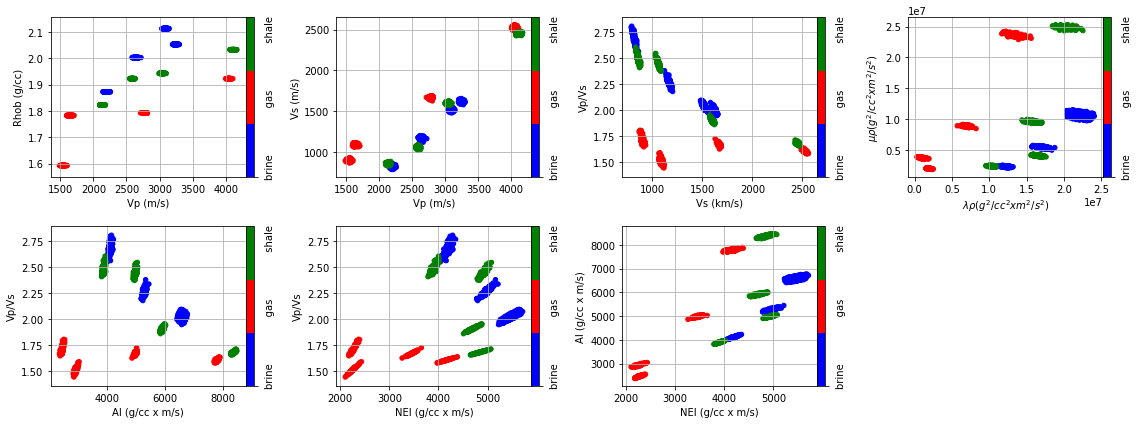

In [31]:
fig=plt.figure(figsize=(16,6))

ax=plt.subplot(2,4,1)
plt.scatter(vp,rho,20,c=faceis_vet,cmap=cmap_facies)
ax.set_xlabel('Vp (m/s)')
ax.set_ylabel('Rhob (g/cc)')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label((15*' ').join(['brine', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

ax=plt.subplot(2,4,2)
plt.scatter(vp,vs,20,c=faceis_vet,cmap=cmap_facies)
ax.set_xlabel('Vp (m/s)')
ax.set_ylabel('Vs (m/s)')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label((15*' ').join(['brine', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

ax=plt.subplot(2,4,3)
plt.scatter(vs,vpvs,20,c=faceis_vet,cmap=cmap_facies)
ax.set_xlabel('Vs (km/s)')
ax.set_ylabel('Vp/Vs')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label((15*' ').join(['brine', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

ax=plt.subplot(2,4,4)
plt.scatter(lambda_rho,mu_rho,20,c=faceis_vet,cmap=cmap_facies)
ax.set_xlabel(r'$\lambda\rho (g^2/cc^2 x m^2/s^2)$')
ax.set_ylabel(r'$\mu\rho (g^2/cc^2 x m^2/s^2)$')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label((15*' ').join(['brine', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

ax=plt.subplot(2,4,5)
plt.scatter(ai,vpvs,20,c=faceis_vet,cmap=cmap_facies)
ax.set_xlabel('AI (g/cc x m/s)')
ax.set_ylabel('Vp/Vs')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label((15*' ').join(['brine', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

ax=plt.subplot(2,4,6)
plt.scatter(nei,vpvs,20,c=faceis_vet,cmap=cmap_facies)
ax.set_xlabel('NEI (g/cc x m/s)')
ax.set_ylabel('Vp/Vs')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label((15*' ').join(['brine', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

ax=plt.subplot(2,4,7)
plt.scatter(nei,ai,20,c=faceis_vet,cmap=cmap_facies)
ax.set_xlabel('NEI (g/cc x m/s)')
ax.set_ylabel('AI (g/cc x m/s)')
plt.grid()
cbar=plt.colorbar(pad=0)
cbar.set_label((15*' ').join(['brine', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')


plt.tight_layout()

### References:

Connolly, P., 1999, Elastic impedance: The Leading Edge, 18, 438–452.

del Monte, A. A., 2015. Seismic petrophysics: Part 1. The Leading Edge, 34(4), 440-442.

Goodway, B., T. Chen, and J. Downton, 1997, Improved AVO fluid detection and lithology discrimination using Lamé petrophysical parameters; “λρ”, “μρ”, & “λ/μ fluid stack” from P and S inversions: 67th Annual International Meeting, SEG, Expanded Abstracts, 183-186.

Hilterman, F. J., 2001. Seismic amplitude interpretation: 2001 distinguished instructor short course (No. 4). SEG Books.

Whitcombe, D, 2002, Elastic impedance normalization, Geophysics, 67 (1), 60–62.
 
https://github.com/aadm/avo_explorer